# Welcome to the Data Challenge

## What is the goal of this workshop?

Through this workshop, you will learn the ropes of the complete process that a Data Scientist goes through in order to transform data into valuable knowledge.

### What data ?

Your input data will be a file containing daily information for customers' ticketing. From this data, we will extract different groups of customers with different habits.

### How ?

With this goal in mind, you will perform the following steps :<br/><br/>
1. Prepare the coding environment<br/>
2. Load the data into this python script<br/>
3. Prepare the data for future analysis<br/>
4. Explore the data to gain some general insights about it<br/>
5. Create useful features to characterize customers' habits<br/>
6. Run a machine learning model : K-Means algorithm<br/>
7. Find the optimal number of clusters<br/>

## 1. Prepare the coding environment

Through this workshop, we will use some tools called libraries that will help us in our workflow.<br/>
<br />Libraries are powerful and efficient (fast) tools created by the python community that allow us to write very little code to perform complex actions. There are a lot of python libraries and we will only be using a few of them through this workshop :

|Library &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Description &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Usual acronym inside code &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|:--|:--|:--|
|pandas|data manipulation and analysis library|pd|
|scikit-learn|machine learning library|sk|
|numpy|fast mathematical computation (used by pandas and many other libraries) library|np|
|seaborn|data visualization library|sns|
|matplotlib|plot library|plt|

Now let's import those libraries.

In [22]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---
Our data is stored in Transdev's AWS servers ; we import the dataset from it.

In [23]:
# import io
# import requests
# url="https://translead-atelier.s3-eu-west-1.amazonaws.com/dev/lieusaint-uniform.csv"
# s=requests.get(url).content

## 2. Load the data

---
Let's use pandas read_csv built-in function to load the data.

In [24]:
# data=pd.read_csv(io.StringIO(s.decode('utf-8')), delimiter=";")
data=pd.read_csv("Datasets/lieusaint-uniform.csv", delimiter=",")

**Note :** the _data_ object will be used throughout the whole notebook. It is our main data container. 

---
Let's check what our data looks like.

In [25]:
data

,customer_id,stop,date,tap_on_time
0,368907000,11,06/05/2019,04:41:00
1,841076000,581,06/05/2019,04:52:00
2,53292600,9,06/05/2019,04:54:00
3,351837000,9,06/05/2019,04:54:00
4,857976000,9,06/05/2019,04:54:00
...,...,...,...,...
547967,242525000,2007,28/05/2019,18:07:00
547968,268664000,2007,28/05/2019,18:07:00
547969,452026000,2007,28/05/2019,18:07:00
547970,539087000,2007,28/05/2019,18:07:00


We have four columns :
>
>- customer_id is the id of the customer
>- stop corresponds to the id of the stop where the user started his journey
>- date is the day where the customer took the transport
>- tap_on_time is the time where the customer took the transport

## 3. Prepare the data for future analysis
---
<img style="float: right;" src="dropdown_excel.png">


<br/>Like with any dataset, every column corresponds to a certain type of object. We, humans, understand directly what the type of an object should be :
- 16/01/1997 is a date
- "hello world" is text
- 56°C is a measure of temperature

However, pandas (the library that we use to load the data) doesn't always correctly recognize the type of our columns. Therefore we might need to specify manually the type of columns to pandas : it's exactly the same thing as on excel software when we use the drop down menu (see image beside this text).

Let's check the current type of our columns !

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547972 entries, 0 to 547971
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  547972 non-null  object
 1   stop         547972 non-null  int64 
 2   date         547972 non-null  object
 3   tap_on_time  547972 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.7+ MB


Pandas didn't recognized our data types correctly.<br/><br/>

As a result, we will convert our columns to the following data types :
- _customer_id_ : a _customer_id_ is a categorical data rather than numeric so we will convert it to a category object.
- line : category object
- stop : category object
- date : a specific type exists for dates, which is called datetime. We will use datetime for our dates' column.
- time : a specific type exists for times, which is called timedelta. We will use timedelta for our times' column.

Let's make these changes.

In [27]:
data["customer_id"] = data["customer_id"].astype("category")
# data["line"] = data["line"].astype("category")
data["stop"] = data["stop"].astype("category")
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")
data["tap_on_time"] = pd.to_timedelta(data["tap_on_time"])

---
Let's check if our changes appear correctly.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547972 entries, 0 to 547971
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   customer_id  547972 non-null  category       
 1   stop         547972 non-null  category       
 2   date         547972 non-null  datetime64[ns] 
 3   tap_on_time  547972 non-null  timedelta64[ns]
dtypes: category(2), datetime64[ns](1), timedelta64[ns](1)
memory usage: 13.1 MB


Thanks to our careful definition of what each column type should be, we will have a cleaner workflow in future steps.

---
## 4. Explore the data

### Some statistical indexes

Now we'll use the built-in function _describe_ (from pandas library) that gives general insights on our data.<br/><br/>
For categorical data and datetimes, _describe_ gives those information :
>- count : total number of non-empty values
>- unique : number of different values
>- top : value that appears the most
>- freq : number of times that the "top" value appears
>- _(only datetimes)_ first : smallest value
>- _(only datetimes)_ last : biggest value

For numerical data and timedeltas, _describe_ gives those information :
>- count : total number of non-empty values
>- mean
>- std : standard deviation
>- min : minimum value
>- 25% : first quartile
>- 50% : median
>- 75% : 3rd quartile
>- max : maximum value

---
Let's get insights about our customer_id column.

In [29]:
data["customer_id"].describe()

count       547972
unique       49569
top       63198600
freq           165
Name: customer_id, dtype: object

---
Let's get insights about our stop column.

In [30]:
data["stop"].describe()

count     547972
unique       574
top         2000
freq       33088
Name: stop, dtype: int64

---
Let's get insights about our date column.

In [31]:
data["date"].describe()

count                  547972
unique                     23
top       2019-05-14 00:00:00
freq                    31890
first     2019-05-06 00:00:00
last      2019-05-28 00:00:00
Name: date, dtype: object

---
Let's get insights about our tap_on_time column.

In [32]:
data["tap_on_time"].describe()

count                    547972
mean     0 days 13:10:22.430197
std      0 days 04:43:55.240572
min             0 days 00:00:00
25%             0 days 08:22:00
50%             0 days 13:43:00
75%             0 days 17:19:00
max             0 days 23:59:00
Name: tap_on_time, dtype: object

Time isn't categorical, so _describe_ gives insights about mean, standard deviation, min value, max value, and quartiles.

### Some graphical insights

In our data, one row matches a single trip. As a result, plotting distributions requires few steps :
- group the rows per a criteria we are interested in
- count/sum/average (any operation) in each group
- plot the result

---
#### What is the number of customers per number of trips ?

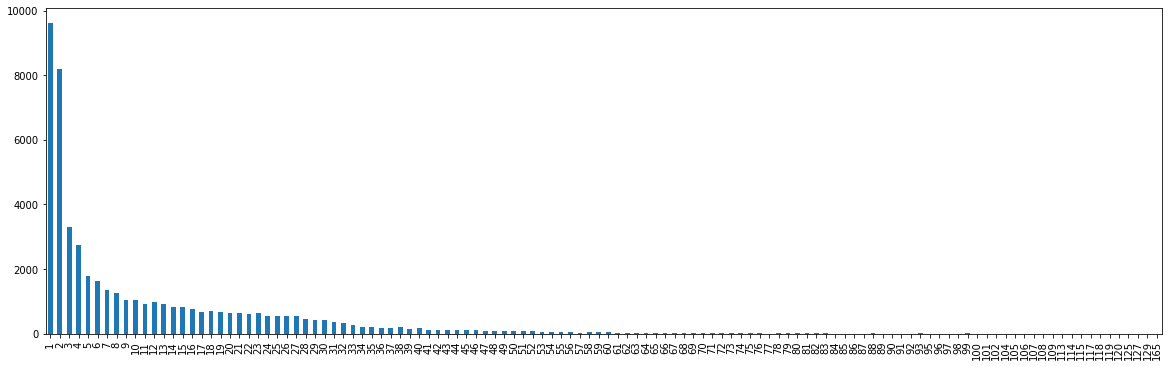

In [33]:
plt.figure(figsize=(20,6))
num_trips_per_customer = data["customer_id"].groupby(data["customer_id"]).count()
monotone_trips = num_trips_per_customer.groupby(num_trips_per_customer.values).count()
monotone_trips.plot(kind="bar")

Percentage values : 

In [34]:
(monotone_trips / data["customer_id"].nunique() * 100).head(20)

1     19.395187
2     16.518389
3      6.679578
4      5.549840
5      3.621215
6      3.310537
7      2.731546
8      2.523755
9      2.110190
10     2.087999
11     1.847929
12     1.956868
13     1.858016
14     1.670399
15     1.676451
16     1.545321
17     1.331477
18     1.422260
19     1.337530
20     1.319373
Name: customer_id, dtype: float64

---
#### What is the number of customers per number of origins ?

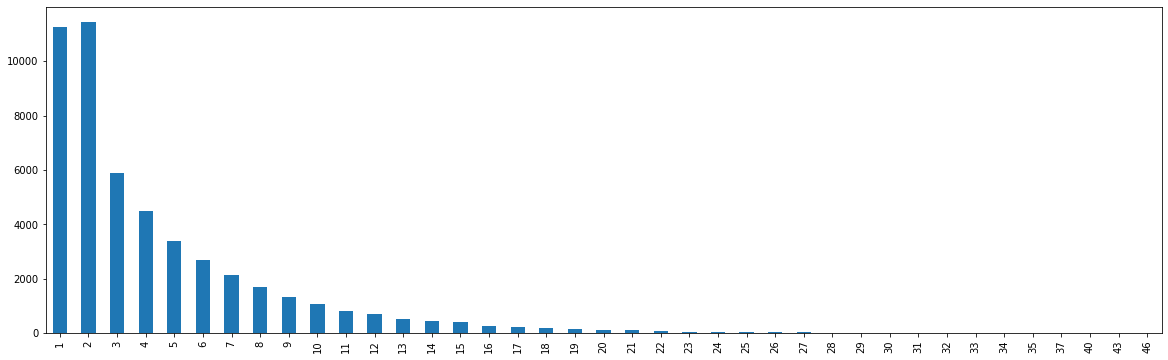

In [35]:
plt.figure(figsize=(20,6))
num_origins_per_customer = data["stop"].groupby(data["customer_id"]).nunique()
num_customers_per_origin = num_origins_per_customer.groupby(num_origins_per_customer.values).count()
num_customers_per_origin.plot(kind="bar")

Percentage values : 

In [36]:
(num_customers_per_origin / num_customers_per_origin.sum() * 100).round(2).head(20)

1     22.69
2     23.05
3     11.90
4      9.06
5      6.80
6      5.41
7      4.30
8      3.43
9      2.67
10     2.17
11     1.66
12     1.40
13     1.08
14     0.91
15     0.79
16     0.54
17     0.45
18     0.34
19     0.28
20     0.22
Name: stop, dtype: float64

---
#### What is the distribution of trips across time ?

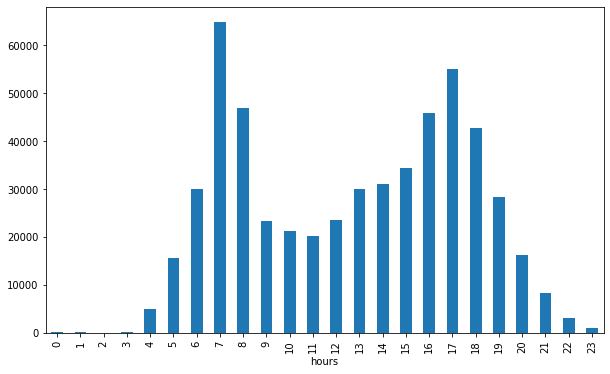

In [37]:
plt.figure(figsize=(10,6))
commutes_per_hour = data["tap_on_time"].groupby(data["tap_on_time"].dt.components['hours']).count()
commutes_per_hour.plot(kind="bar")

**Percentage values :**

In [38]:
(commutes_per_hour / commutes_per_hour.sum() * 100).round(2).head(24) 

hours
0      0.04
1      0.02
2      0.02
3      0.03
4      0.92
5      2.86
6      5.47
7     11.83
8      8.56
9      4.26
10     3.89
11     3.71
12     4.29
13     5.49
14     5.68
15     6.30
16     8.38
17    10.04
18     7.82
19     5.19
20     2.96
21     1.52
22     0.58
23     0.18
Name: tap_on_time, dtype: float64

**Peak hour trips percentage :**

In [39]:
(commutes_per_hour[[7,8,16,17,18,19]].sum() / commutes_per_hour.sum() * 100).round(2)

51.81

---
#### How are trips distributed among different stops ?

Text(0, 0.5, 'number of trips')

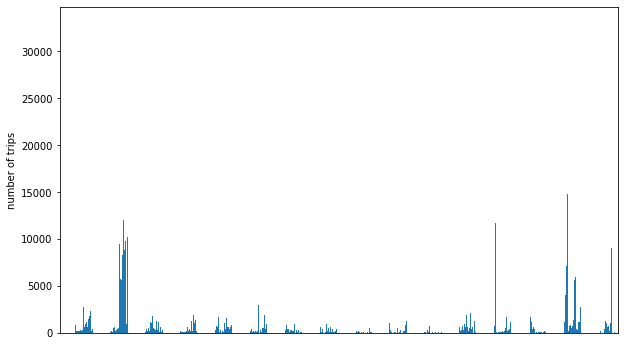

In [40]:
plt.figure(figsize=(10,6))
trips_per_stop = data["stop"].groupby(data["stop"]).count()
stops_plot = trips_per_stop.plot(kind="bar")
stops_plot.axes.get_xaxis().set_visible(False)  # MAKES THE X AXIS INVISIBLE
plt.ylabel("number of trips")  # ADDS A LABEL TO OUR Y AXIS

**Percentage values :**

In [41]:
(trips_per_stop / trips_per_stop.sum() * 100).round(2).sort_values(ascending=False).head(20)

stop
2000    6.04
2027    3.83
2009    2.70
70      2.20
2       2.17
591     2.13
1       1.92
75      1.87
3       1.83
73      1.78
65      1.72
9055    1.64
414     1.61
71      1.61
69      1.52
2008    1.30
5       1.12
172     1.10
2017    1.09
376     1.08
Name: stop, dtype: float64

#### How are trips distributed along the days of the week ?

This plot is a little bit more tricky than the previous examples for two reasons :
- we don't have a column that stores which day of the week corresponds to the date.
- we have 23 days of data. 23/7 = 3 weeks + 2 days. For two certain days of the week, we will have more data than for others. We will need to take that into account.

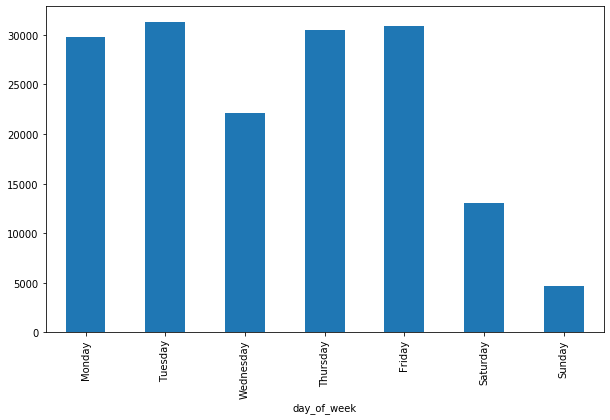

In [42]:
plt.figure(figsize=(10,6))
data['day_of_week'] = pd.Categorical(data['date'].dt.day_name(), categories=[
                                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                     ordered=True)
grouped_data_per_date = data[["day_of_week"]].groupby(data["date"]).first()
grouped_data_per_date["trips_count"] = data["day_of_week"].groupby(data["date"]).count()
mean_trips_per_day = grouped_data_per_date["trips_count"].groupby(grouped_data_per_date["day_of_week"]).mean()
mean_trips_per_day.plot(kind="bar")

**Percentage values :** 

In [43]:
(mean_trips_per_day / mean_trips_per_day.sum() * 100).round(2).head(7)

day_of_week
Monday       18.35
Tuesday      19.29
Wednesday    13.61
Thursday     18.80
Friday       19.01
Saturday      8.04
Sunday        2.89
Name: trips_count, dtype: float64

**Weekday trips percentage :**

In [44]:
(mean_trips_per_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum() / mean_trips_per_day.sum() * 100).round(2)

89.07

## 5. Create useful features to characterize customers' habits

Now let's dive into the final goal of this workshop : identifying different groups of customers thanks to a clustering algorithm, K-Means. First let's get an intuition of how K-Means work.

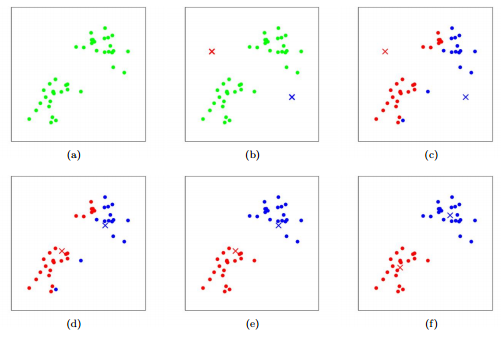


K-Means performs the following steps :

 **a)** 
- We have some data points in 2D plane. They all have x and y coordinates.

**b)** 
- We take K = 2 (it's the K from K-Means), which means we will have 2 clusters (2 groups), at the end of the algorithm. 
- Since we chose K = 2, we place 2 random points in our 2D plane : a red cross and a blue cross. These 2 points are called **centroids**.

**c)** 
- We associate each **data point** to the **closest centroid**. Data points closest to the red cross are marked as red points, and data points closest to the blue cross are marked as blue points.

**d)**
- We calculate **new positions for our centroids**. The **new red centroid** will be the **center of the red points** and the **new blue centroid** will be the **center of the blue points**.

**e)**
- We **repeat step c)**. We associate each data point to the closest centroid. **Some points will remain the same color, but others will change** of color because they are now closer to the cross of the other color.
**f)**
- We **repeat step d)**. We calculate new positions for our centroids again.

etc. etc.

We stop this process when the centroids' positions don't change anymore : it means we reached convergence.

---
### How do we apply K-Means clustering to our data ?
In the previous K-Means drawings, two different groups are clearly identifiable : this means that the x and y axis are **useful, meaningful features** to distinguish a red point from a blue point.

#### In our case, we want to cluster public transportation customers : what features could be useful and meaningful to distinguish a customer from another ?

In the clustering that you will perform, the data team chose the following criteria to discriminate customers. For each customer, we will use :
- ratio between his trips on weekdays and his total trips
- ratio between his trips in peak hours and his weekdays trips
- number of different stops where he validated 
- his number of trips
- his trip frequency

We don't have those indicators in our data ; therefore we need to **build them from the original data we have**.

#### Add new booleans (0 or 1) columns to our original _data_ object

In [45]:
def is_weekday(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 1
    else:
        return 0


data["is_weekday"] = data["day_of_week"].apply(lambda day: is_weekday(day))

def is_peak_hour(row):
    tap_on_time = row["tap_on_time"].components.hours
    is_weekday_bool = row["is_weekday"]
    if is_weekday_bool == 1:
        if 7 <= tap_on_time <= 8 or 16 <= tap_on_time <= 19:
            return 1
        else:
            return 0
    else:
        return 0

data["is_peak_hour"] = data[["tap_on_time", "is_weekday"]].apply(
    lambda row: is_peak_hour(row), axis=1)

In [46]:
data

,customer_id,stop,date,tap_on_time,day_of_week,is_weekday,is_peak_hour
0,368907000,11,2019-05-06,04:41:00,Monday,1,0
1,841076000,581,2019-05-06,04:52:00,Monday,1,0
2,53292600,9,2019-05-06,04:54:00,Monday,1,0
3,351837000,9,2019-05-06,04:54:00,Monday,1,0
4,857976000,9,2019-05-06,04:54:00,Monday,1,0
...,...,...,...,...,...,...,...
547967,242525000,2007,2019-05-28,18:07:00,Tuesday,1,1
547968,268664000,2007,2019-05-28,18:07:00,Tuesday,1,1
547969,452026000,2007,2019-05-28,18:07:00,Tuesday,1,1
547970,539087000,2007,2019-05-28,18:07:00,Tuesday,1,1


#### Create a dataframe where we will store data for each customer
---
Let's create a new dataframe called _customer_data_ to store data relative to each customer. This dataframe contains 1 row per customer in the original data.

In [47]:
customer_data = pd.DataFrame()
customer_data["customer_id"] = data["customer_id"].drop_duplicates().array

# Add ratio between a customer's trips on weekdays and his total trips
customer_weekday_weekend_ratios = data["is_weekday"].groupby(data["customer_id"]).mean()
customer_weekday_weekend_ratios = customer_weekday_weekend_ratios.rename("weekday_ratio")
customer_data = pd.merge(customer_data, customer_weekday_weekend_ratios, on="customer_id")

# Add ratio between a customer's trips in peak hours and his weekdays' trips
customer_peak_hour_ratios = data["is_peak_hour"].groupby(data["customer_id"]).sum() / data["is_weekday"].groupby(data["customer_id"]).sum()
customer_peak_hour_ratios = customer_peak_hour_ratios.fillna(0)
customer_peak_hour_ratios = customer_peak_hour_ratios.rename("peak_hour_ratio")
customer_data = pd.merge(customer_data, customer_peak_hour_ratios, on="customer_id")

# Add a score representing a customer's unique stops used
unique_stops_count = data["stop"].groupby(data["customer_id"]).nunique()
unique_stops_score = unique_stops_count.rename("unique_stops")
customer_data = pd.merge(customer_data, unique_stops_score, on="customer_id")

# Add a score representing a customer's number of trips
number_of_trips = data["customer_id"].groupby(data["customer_id"]).count()
number_of_trips = number_of_trips.rename("num_trips")
customer_data = pd.merge(customer_data, number_of_trips, on="customer_id")

# Add a score representing how often a customer travels
customer_dates = data["date"].groupby(data["customer_id"])
days_travelled_total_days_ratios = customer_dates.nunique() / ((customer_dates.max() - customer_dates.min()).dt.days + 1)
days_travelled_total_days_ratios = days_travelled_total_days_ratios.rename("days_travelled_ratio")
customer_data = pd.merge(customer_data, days_travelled_total_days_ratios, on="customer_id")


# SHOW THE RESULT
customer_data

,customer_id,weekday_ratio,peak_hour_ratio,unique_stops,num_trips,days_travelled_ratio
0,368907000,0.827586,0.500000,8,29,0.652174
1,841076000,1.000000,0.071429,6,28,0.652174
2,53292600,1.000000,0.428571,2,28,0.695652
3,351837000,1.000000,0.071429,2,14,0.565217
4,857976000,1.000000,0.000000,3,10,0.352941
...,...,...,...,...,...,...
49564,362592000,1.000000,1.000000,1,1,1.000000
49565,432488000,1.000000,0.000000,1,1,1.000000
49566,16312200,1.000000,0.000000,1,1,1.000000
49567,587084000,1.000000,1.000000,1,1,1.000000


In [48]:
customer_data.describe()

,weekday_ratio,peak_hour_ratio,unique_stops,num_trips,days_travelled_ratio
count,49569.000000,49569.000000,49569.000000,49569.000000,49569.000000
mean,0.840104,0.451628,4.369909,11.054732,0.672746
std,0.306031,0.364989,4.141670,13.377970,0.293479
min,0.000000,0.000000,1.000000,1.000000,0.086957
25%,0.844828,0.000000,2.000000,2.000000,0.416667
50%,1.000000,0.482759,3.000000,5.000000,0.666667
75%,1.000000,0.750000,6.000000,16.000000,1.000000
max,1.000000,1.000000,46.000000,165.000000,1.000000


## 6. Run a machine learning model : K-Means algorithm

### Standardize our data

In [49]:
from scipy import stats
# customer_data = customer_data[customer_data["weekday_ratio"].quantile(.005) < customer_data["weekday_ratio"] < customer_data["weekday_ratio"].quantile(.995)]
# customer_data = customer_data[customer_data.between(customer_data.quantile(.005), customer_data.quantile(.995))]
customer_data_no_outliers = customer_data

# temp = customer_data.loc[:, customer_data.columns != 'customer_id']
# customer_data_no_outliers = customer_data[(np.abs((temp-temp.median())/temp.mad()) < 5).all(axis=1)]
customer_data_no_outliers = customer_data_no_outliers[customer_data_no_outliers.num_trips >= 3]
customer_data_no_outliers.reset_index()

kmeans_data = customer_data_no_outliers.loc[:, customer_data_no_outliers.columns != 'customer_id']
kmeans_data = (kmeans_data - kmeans_data.median()) / kmeans_data.mad()
customer_data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31767 entries, 0 to 49487
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customer_id           31767 non-null  category
 1   weekday_ratio         31767 non-null  float64 
 2   peak_hour_ratio       31767 non-null  float64 
 3   unique_stops          31767 non-null  int64   
 4   num_trips             31767 non-null  int64   
 5   days_travelled_ratio  31767 non-null  float64 
dtypes: category(1), float64(3), int64(2)
memory usage: 3.2 MB


In [50]:
kmeans_data

,weekday_ratio,peak_hour_ratio,unique_stops,num_trips,days_travelled_ratio
0,-1.332787,0.000000,0.936634,1.588111,0.672275
1,0.000000,-1.727204,0.312211,1.494693,0.672275
2,0.000000,-0.287867,-0.936634,1.494693,0.904515
3,0.000000,-1.727204,-0.936634,0.186837,0.207794
4,0.000000,-2.015071,-0.624423,-0.186837,-0.926086
...,...,...,...,...,...
49397,0.000000,0.671690,-0.624423,-0.840765,2.530198
49403,0.000000,0.000000,-0.624423,-0.747346,2.530198
49422,0.000000,0.671690,-0.624423,-0.840765,2.530198
49446,0.000000,0.000000,-0.312211,-0.747346,2.530198


### Run K-Means on our data

In [51]:
from sklearn.cluster import KMeans
chosen_k = 5
kmeans = KMeans(n_clusters=chosen_k).fit(kmeans_data) 
customer_data_no_outliers.loc[:,"cluster"] = kmeans.labels_

C:\Users\Didou\Miniconda3\envs\translead_env\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Didou\Miniconda3\envs\translead_env\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
customer_data_no_outliers

,customer_id,weekday_ratio,peak_hour_ratio,unique_stops,num_trips,days_travelled_ratio,cluster
0,368907000,0.827586,0.500000,8,29,0.652174,4
1,841076000,1.000000,0.071429,6,28,0.652174,4
2,53292600,1.000000,0.428571,2,28,0.695652,4
3,351837000,1.000000,0.071429,2,14,0.565217,0
4,857976000,1.000000,0.000000,3,10,0.352941,0
...,...,...,...,...,...,...,...
49397,513193000,1.000000,0.666667,3,3,1.000000,3
49403,816210000,1.000000,0.500000,3,4,1.000000,4
49422,229659000,1.000000,0.666667,3,3,1.000000,3
49446,930101000,1.000000,0.500000,4,4,1.000000,4


### Graphical representation of our results

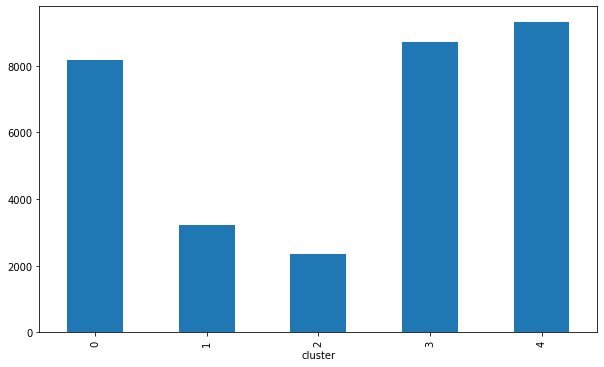

In [53]:
plt.figure(figsize=(10,6))
clusters_size = customer_data_no_outliers["cluster"].groupby(customer_data_no_outliers["cluster"]).count()
clusters_size.plot(kind="bar")

**Percentage of each cluster :**

In [54]:
(clusters_size / clusters_size.sum() * 100).round(2).head(chosen_k)

cluster
0    25.72
1    10.14
2     7.39
3    27.41
4    29.34
Name: cluster, dtype: float64

In [ ]:
plt.figure(figsize=(10,6))
pca = sk.decomposition.PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(kmeans_data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=customer_data_no_outliers.cluster, s = 0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
pca.explained_variance_ratio_

## 7. Find the optimal number of clusters

### Run K-Means on 2 to 10 clusters on the data

In [ ]:
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
from sklearn.metrics import silhouette_score
# sil_scores = []
inertias = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(kmeans_data) 
#     sil_scores.append(silhouette_score(kmeans_data, kmeans.labels_, metric='euclidean'))
    inertias.append(kmeans.inertia_)

### Plot the result and choose the optimal K number of clusters

In [ ]:
# sil_scores
inertias

In [ ]:
# plt.plot(list(range(2,kmax+1)),sil_scores)
plt.plot(list(range(2,kmax+1)),inertias)

### Input the chosen optimal number of clusters and see the results

In [ ]:
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k).fit(kmeans_data)
customer_data_no_outliers.loc[:,"cluster"] = kmeans.labels_

### Graphical representation of our results

In [ ]:
plt.figure(figsize=(10,6))
clusters_size = customer_data_no_outliers["cluster"].groupby(customer_data_no_outliers["cluster"]).count()
clusters_size.plot(kind="bar")

**Percentage of each cluster :**

In [ ]:
(clusters_size / clusters_size.sum() * 100).round(2).head(chosen_k)

In [ ]:
from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter, AutoMinorLocator)

fig = plt.figure(figsize=(15,15))
num_metrics = 4

for k in range(0,chosen_k):
    
    k_data = data.loc[data.customer_id.isin(customer_data_no_outliers.loc[customer_data_no_outliers.cluster == k,"customer_id"].values),:]
    plot1 = plt.subplot(num_metrics,chosen_k,k+1)
    trips_per_day = k_data["day_of_week"].groupby(k_data["day_of_week"]).count()
    trips_per_day.plot(kind="bar")
    
    plot2 = plt.subplot(num_metrics,chosen_k,k+1+chosen_k)
    trips_per_time = k_data["tap_on_time"].groupby(k_data["tap_on_time"].dt.components['hours']).count()
    trips_per_time = trips_per_time
    trips_per_time.plot(kind="bar")
    
    plot3 = plt.subplot(num_metrics,chosen_k,k+1+2*chosen_k)
    plot3.set_yscale('log')
    num_trips_per_customer = k_data["customer_id"].groupby(k_data["customer_id"]).count()
    num_cust_per_trips_num = num_trips_per_customer.groupby(num_trips_per_customer.values).count()
    num_cust_per_trips_num = num_cust_per_trips_num.drop(labels=0)
    num_cust_per_trips_num.plot(kind="bar")
    plot3.set(xlabel="number_of_trips")
    
    plot4 = plt.subplot(num_metrics,chosen_k,k+1+3*chosen_k)
    plot4.set_yscale('log')
    num_origins_per_customer = k_data["stop"].groupby(k_data["customer_id"]).nunique()
    num_cust_per_ori_num = num_origins_per_customer.groupby(num_origins_per_customer.values).count()
    num_cust_per_ori_num = num_cust_per_ori_num.drop(labels=0)
    num_cust_per_ori_num.plot(kind="bar")
    plot4.set(xlabel="number_of_origins")


for ax in fig.get_axes():
    ax.xaxis.set_major_locator(LinearLocator(numticks = 7))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["num_trips"], showfliers = False)

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["unique_stops"], showfliers = False)

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["weekday_ratio"], showfliers = False)

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["peak_hour_ratio"], showfliers = False)

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(customer_data_no_outliers["cluster"],customer_data_no_outliers["days_travelled_ratio"], showfliers = False)

In [ ]:
plt.figure(figsize=(10,6))
pca = sk.decomposition.PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(kmeans_data)
plt.scatter(projected[:, 0], projected[:, 1],
            c=customer_data_no_outliers.cluster, s = 0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
pca.explained_variance_ratio_